In [7]:
import warnings
import pandas as pd
import os
import pickle as pk
import tqdm
import matplotlib.pyplot as plt
import numpy as np

import placetmachine as pl

warnings.simplefilter(action='ignore', category=FutureWarning)

def gather_data2(folder, supress_output = False):
    data = []
    _start, _end = 1489, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [2]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [69]:
y1_summary_dict = {
    'iteration': [],
    'n_features': [],
    'score': [],
    'weights': [],
    'features': [],
    'total_loss': [], 
    'zero_loss': [], 
    'orbit_loss': [],
    'exit_orbit_loss': []
}

for i in tqdm.tqdm(range(10)):
    FOLDER = f"data/learning_storage/orbit_supression_2/Y1_sfs1_it{i}"

    tmp = gather_data3(FOLDER, True)
    tmp_sorted = tmp.sort_values(by = ['total_loss'])
    
    y1_summary_dict['iteration'].append(i)
    y1_summary_dict['n_features'].append(len(tmp_sorted.features_ids.values[0]))
    y1_summary_dict['score'].append(tmp_sorted.score.values[0])
    y1_summary_dict['weights'].append(tmp_sorted.weights.values[0])
    y1_summary_dict['features'].append(tmp_sorted.features_ids.values[0])
    y1_summary_dict['total_loss'].append(tmp_sorted.total_loss.values[0]) 
    y1_summary_dict['zero_loss'].append(tmp_sorted.zero_loss.values[0])
    y1_summary_dict['orbit_loss'].append(tmp_sorted.orbit_loss.values[0])
    y1_summary_dict['exit_orbit_loss'].append(tmp_sorted.exit_orbit_loss.values[0])
    
#    print(tmp_sorted.features_ids.values[0])
#    print(tmp_sorted.weights.values[0].ravel())

y1_summary = pd.DataFrame(y1_summary_dict)

y1_summary['problem_loss'] = y1_summary.total_loss - y1_summary.orbit_loss - y1_summary.zero_loss - y1_summary.exit_orbit_loss

print(y1_summary)

100%|██████████| 10/10 [00:00<00:00, 34.11it/s]

   iteration  n_features     score  \
0          0           3  0.049714   
1          1           4  0.257377   
2          2           5  0.319207   
3          3           6  0.582769   
4          4           7  0.832257   
5          5           8  0.879447   
6          6           9  0.906114   
7          7          10  0.921773   
8          8          11  0.939603   
9          9          12  0.962125   

                                             weights  \
0           [[1.0077633], [-1.0106338], [1.2479331]]   
1  [[2.0652046], [-1.0111263], [3.3504906], [0.81...   
2  [[1.0029008], [-1.0026101], [1.0217034], [1.04...   
3  [[4.3001637], [-1.0055672], [13.440013], [1.99...   
4  [[2.8782558], [-1.0312103], [10.886984], [8.07...   
5  [[2.4068296], [-1.0022078], [9.255374], [11.11...   
6  [[1.0281751], [-1.7855656], [24.006685], [9.78...   
7  [[1.0129151], [-1.8210533], [24.220541], [10.4...   
8  [[1.0133141], [-2.2344515], [28.363615], [7.64...   
9  [[1.0034031], [-2.

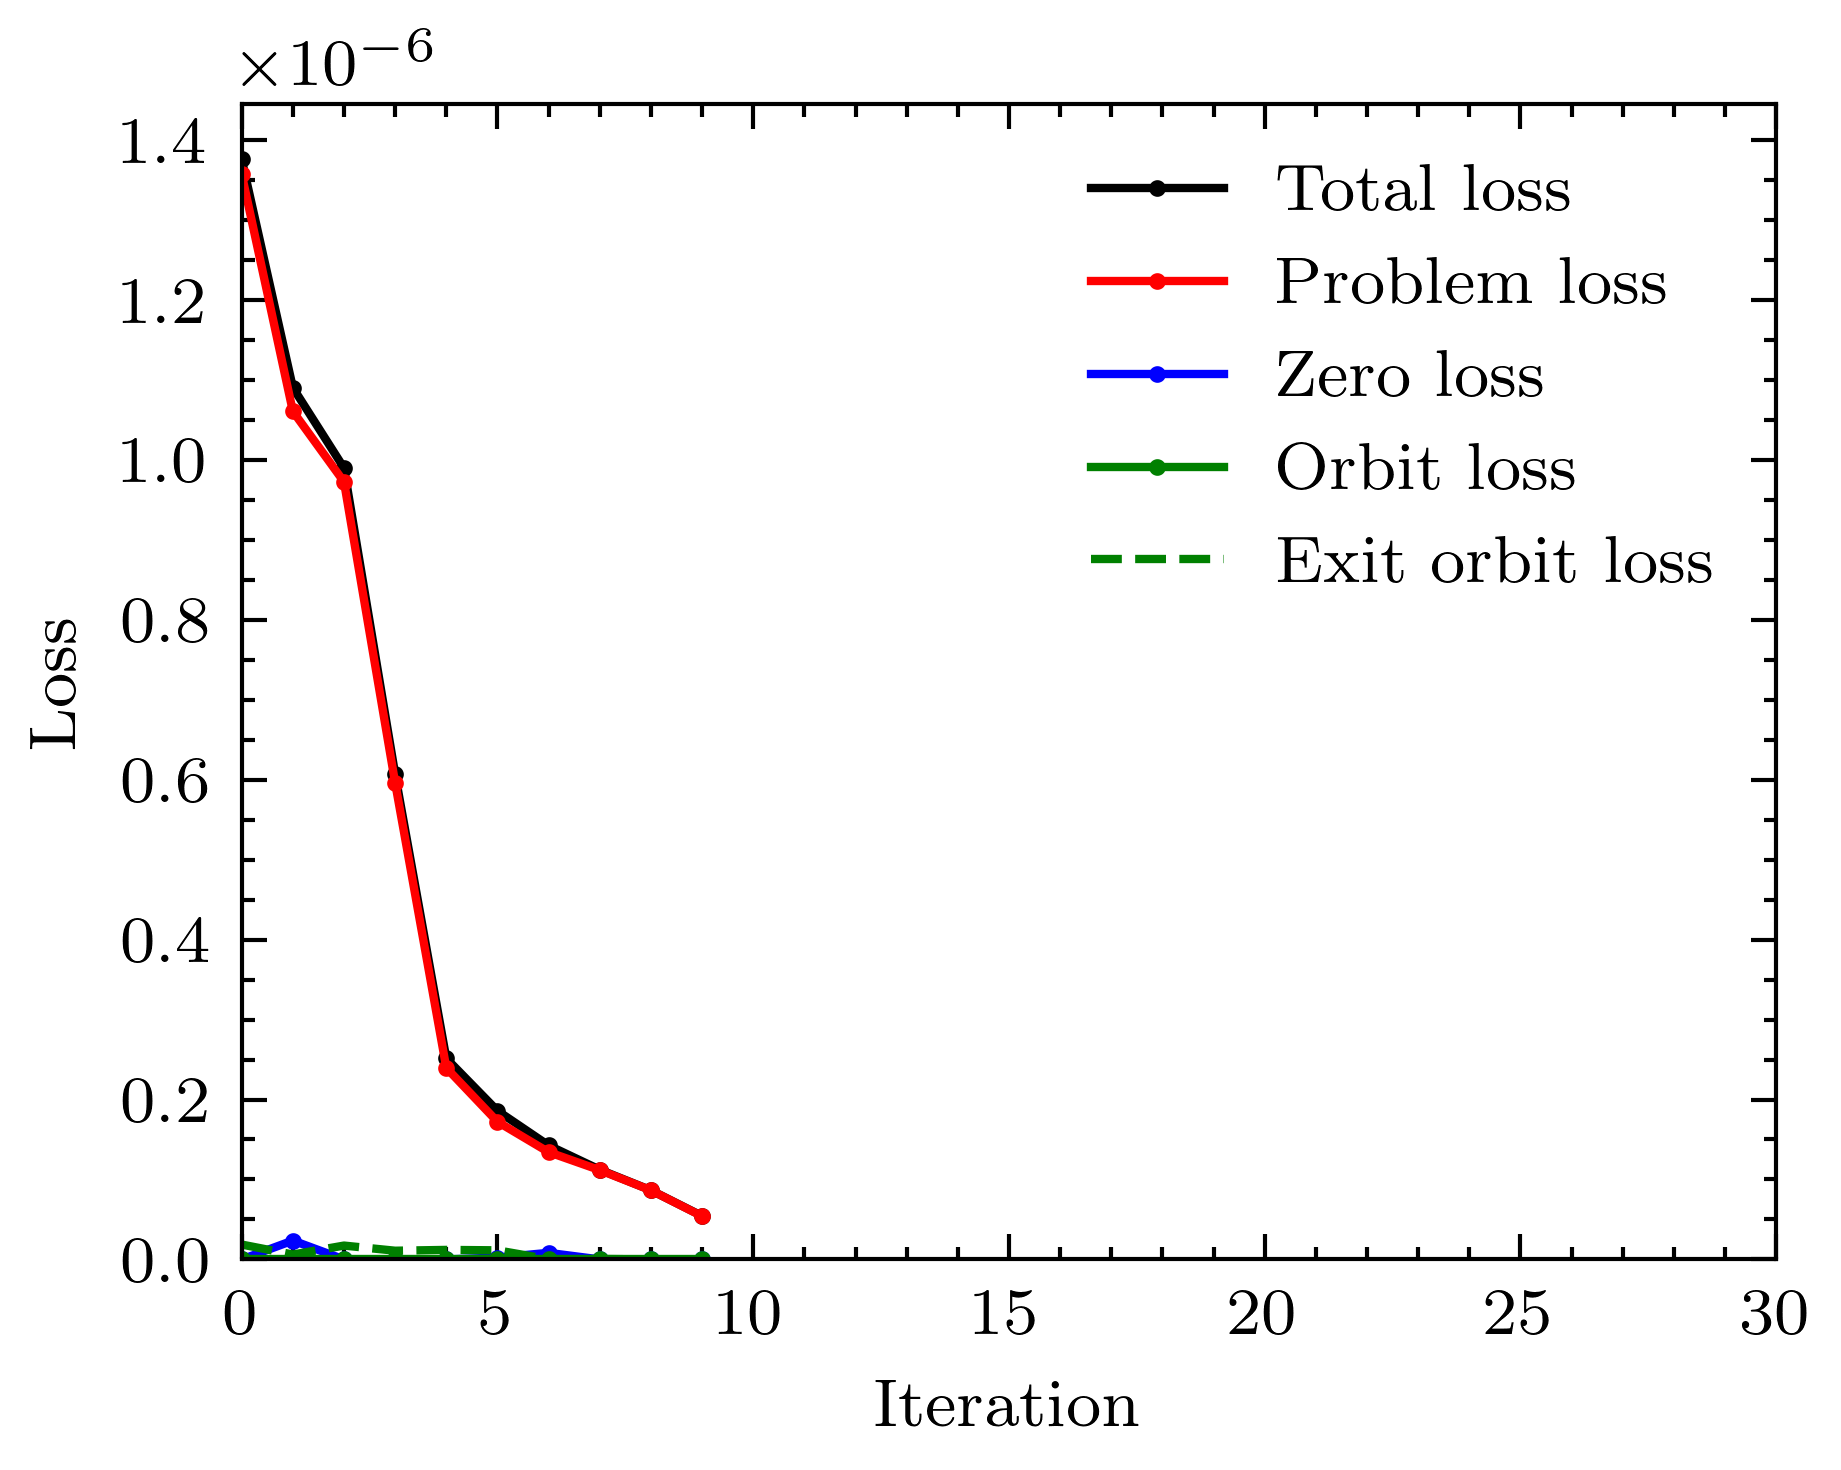

In [70]:
with plt.style.context(['science', 'ieee']):
    plt.plot(y1_summary.iteration, y1_summary.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")
    plt.plot(y1_summary.iteration, y1_summary.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y1_summary.iteration, y1_summary.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(y1_summary.iteration, y1_summary.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(y1_summary.iteration, y1_summary.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")


    plt.xlim(0, 30)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

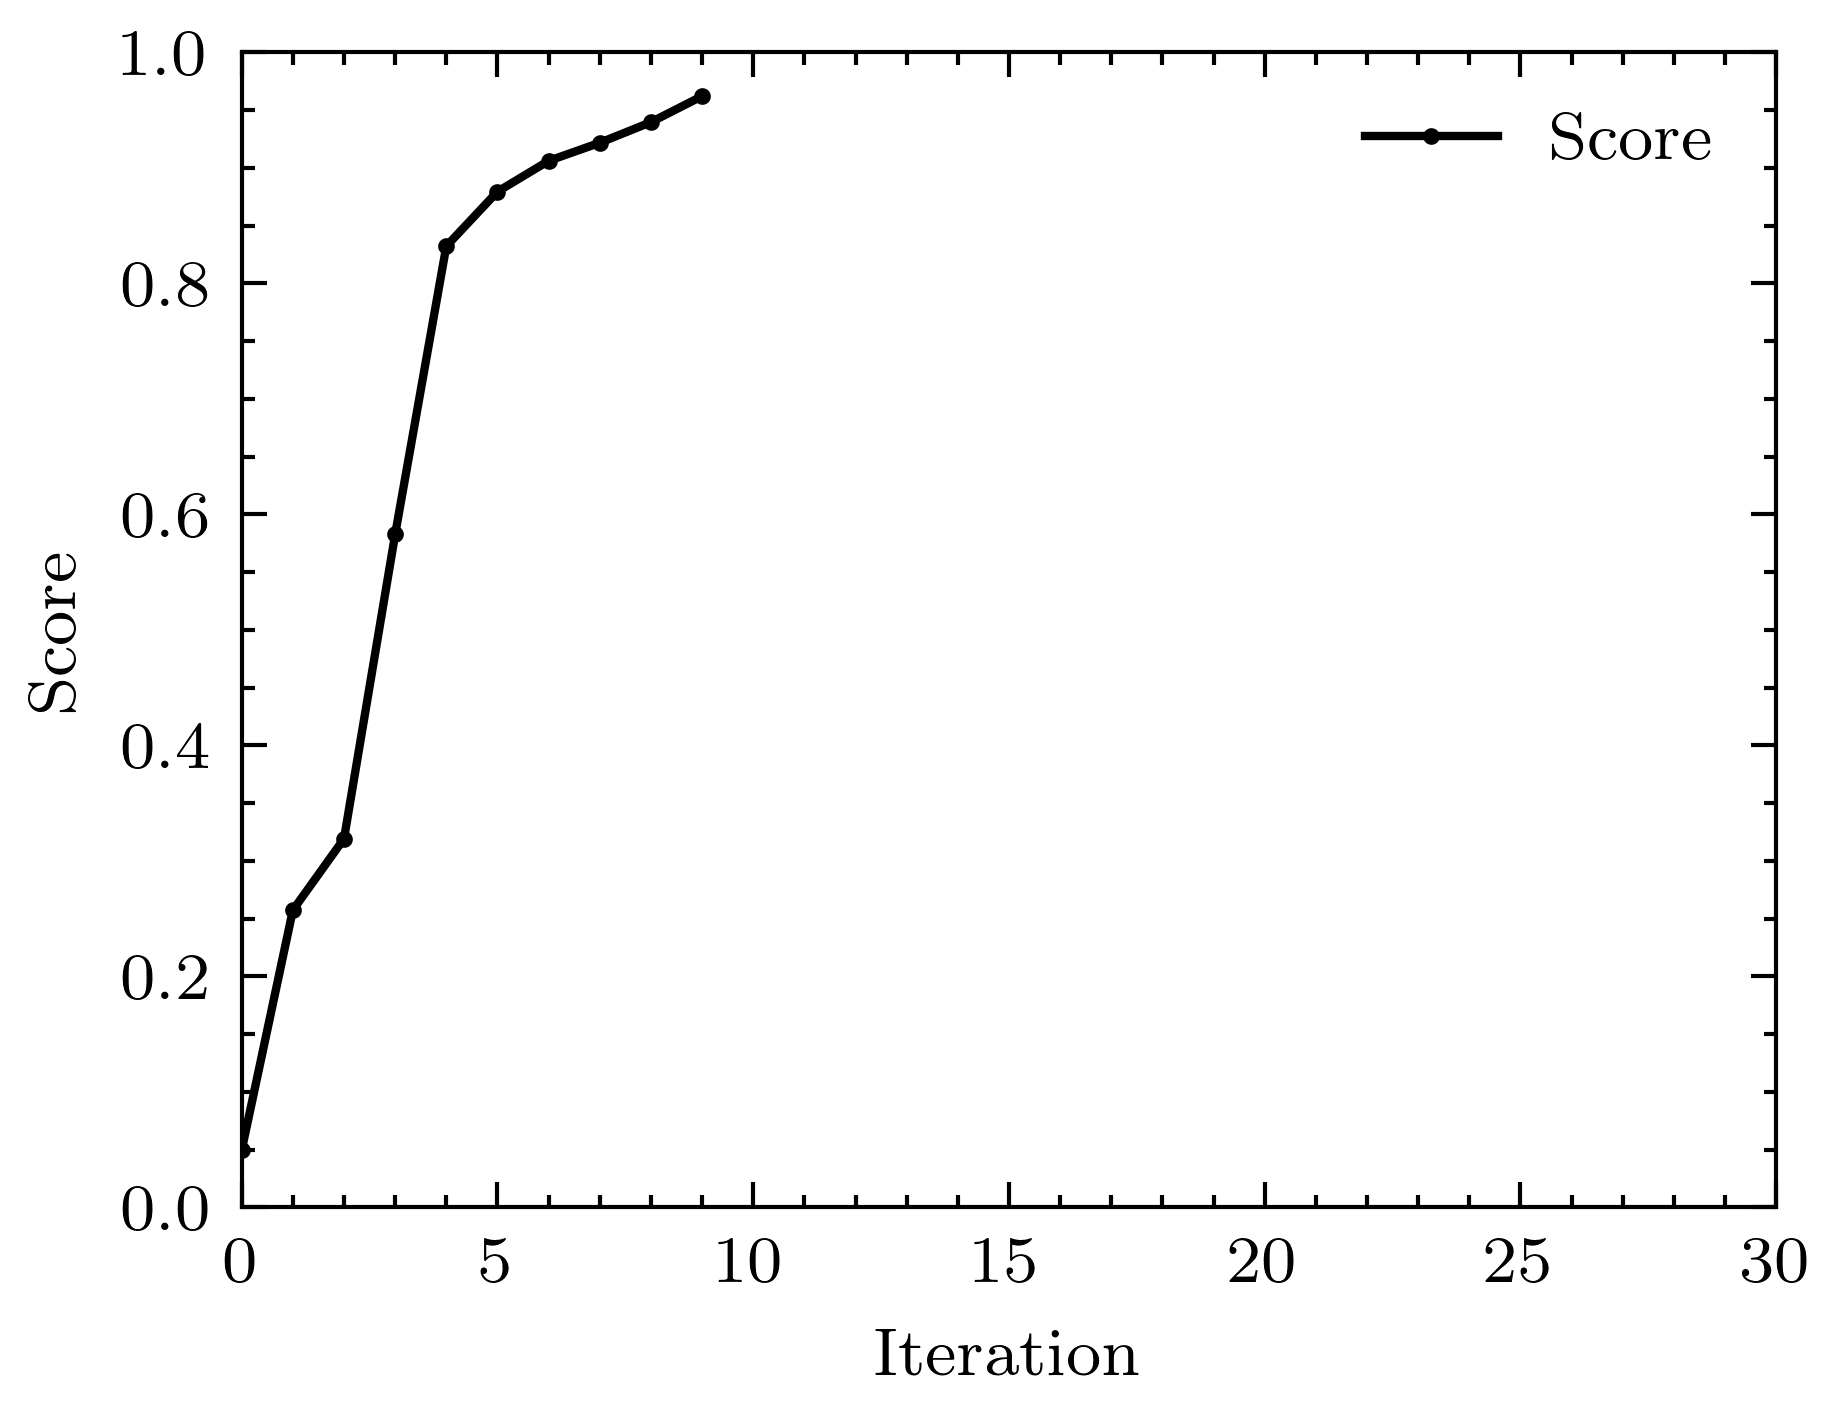

In [71]:
with plt.style.context(['science', 'ieee']):
#    plt.plot(y8_summary.n_features, y8_summary.total_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(y1_summary.iteration, y1_summary.score, '-o', markersize = 1.0, label = "Score", color = "black")
    
    plt.xlim(0, 30)
    plt.ylim(0.0, 1.0)
    
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.show()

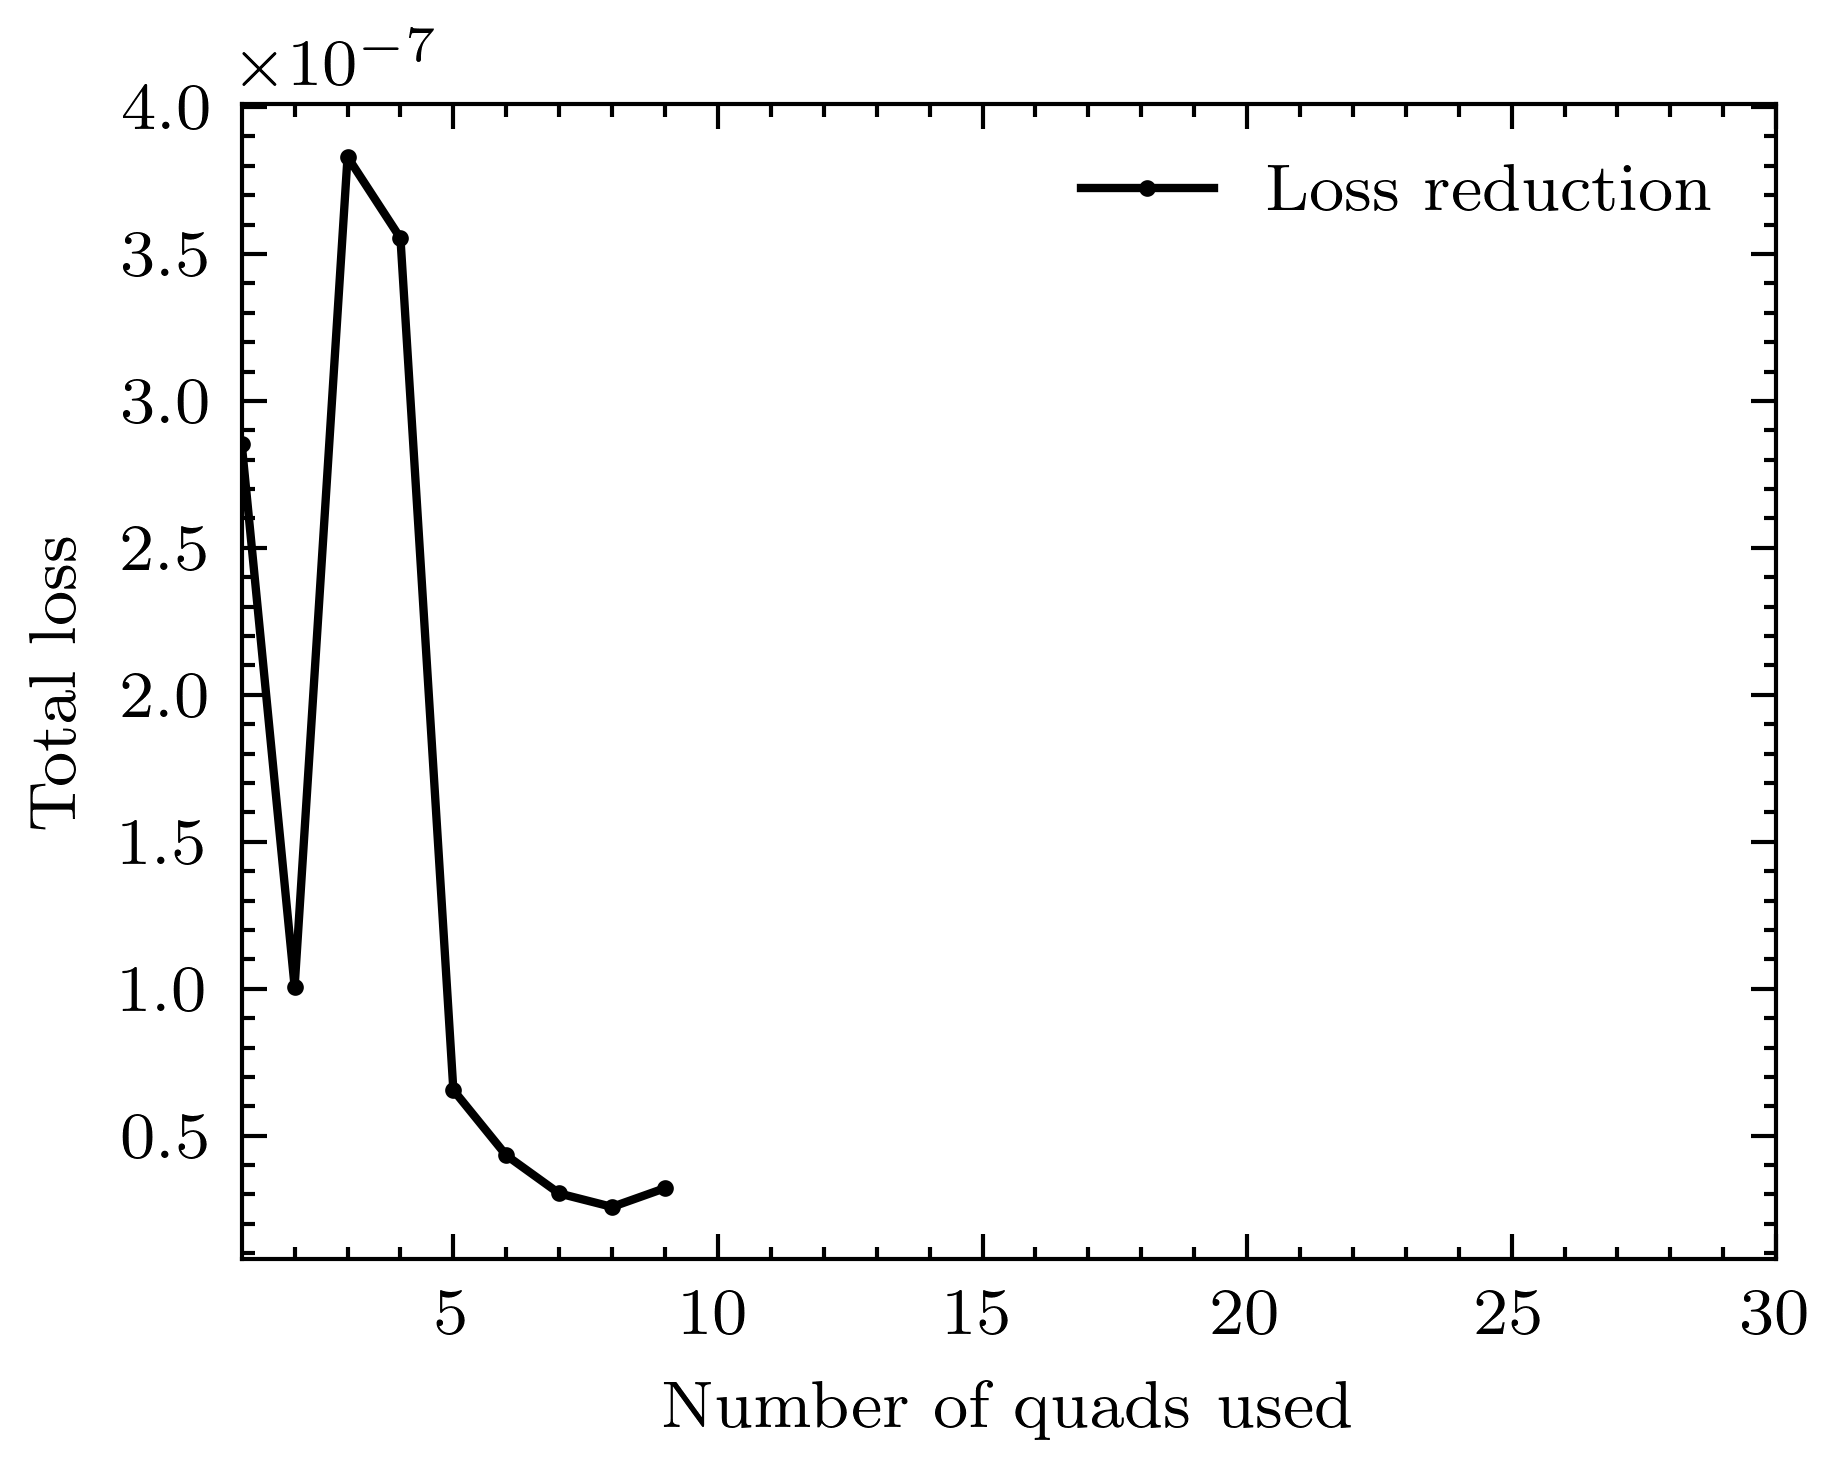

In [68]:
# plotting the dependance of the loss decrese as the function of the number of quads used

loss_reduction = []

for i in range(1, len(y1_summary.total_loss)):
    loss_reduction.append(y1_summary.total_loss[i - 1] - y1_summary.total_loss[i])
    
with plt.style.context(['science', 'ieee']):
    plt.plot(range(1, len(y1_summary.total_loss)), loss_reduction, '-o', markersize = 1.0, label = "Loss reduction", color = "black")

    plt.xlim(1, 30)
#    plt.ylim(0, 1.1e-7)
    
    plt.legend()
    plt.xlabel("Number of quads used")
    plt.ylabel("Total loss")
    plt.show()

In [3]:
import placetmachine as pl

# before doing the knob creation, we need to create the beamline.

# creating a Machine object and the beamline

clic = pl.Machine(console_output = False)

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++

# the following parameters are neccesery to provide to the routine.

beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}

# creating a sliced beam
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, **beam_parameters)

********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

In [4]:
knobs_setup = {
    "Y1": f"data/learning_storage/orbit_supression_2/Y1_sfs1_it9",
}

In [8]:
# In the calculations I used girder and Quadrupoles
# The numbering of girders starts from 0 and after them there are 
# quadrupole. So I need to convert these quad ids into their
# indices in the beamline.

def construct_knobs():
    """
    """
#    print(f"Number of girders is {clic.beamline.get_girders_number()}")

    quads_transform = {}

    quad_index = 1489
    for quad in clic.beamline.extract(['Quadrupole']):
        quads_transform[quad_index] = quad.index
        quad_index += 1

    knobs = []

    for knob in knobs_setup:
        # reading the calculation file
        knob_candidate = gather_data2(knobs_setup[knob], True)

        # sorting the processed data 
        knob_candidate_sorted = knob_candidate.sort_values(by = ['total_loss'])

        weights = knob_candidate_sorted.weights.values[0].ravel()
        features = knob_candidate_sorted.features_ids.values[0]
        print(list(weights), features)

        elements_list = []

        for quad_id in features:
            elements_list.append(clic.beamline[quads_transform[quad_id]])

        knobs.append(pl.Knob(elements_list, 'y', weights, name = knob))
    
    return knobs

In [9]:
knobs = construct_knobs()
for knob in knobs:
    print(knob)


[1.0034031, -2.4138765, 29.554003, 6.9769125, -11.943935, -8.755246, -1.7526971, 12.514738, -4.8155403, 8.288669, 3.7992966, 2.559954] [2061, 2062, 2027, 1763, 1909, 1970, 1728, 1617, 2038, 1589, 1659, 1563]
   name        type  girder           s    x          y   xp   yp
0        Quadrupole    1481  3466.28456  0.0   1.003403  0.0  0.0
1        Quadrupole    1485  3475.65118  0.0  -2.413877  0.0  0.0
2        Quadrupole    1345  3147.81948  0.0  29.554003  0.0  0.0
3        Quadrupole     433  1011.61682  0.0   6.976912  0.0  0.0
4        Quadrupole     873  2042.55832  0.0 -11.943935  0.0  0.0
5        Quadrupole    1117  2613.92214  0.0  -8.755246  0.0  0.0
6        Quadrupole     359   838.32769  0.0  -1.752697  0.0  0.0
7        Quadrupole     137   318.48028  0.0  12.514738  0.0  0.0
8        Quadrupole    1389  3250.85230  0.0  -4.815540  0.0  0.0
9        Quadrupole     101   234.21400  0.0   8.288669  0.0  0.0
10       Quadrupole     221   515.17930  0.0   3.799297  0.0  0.0


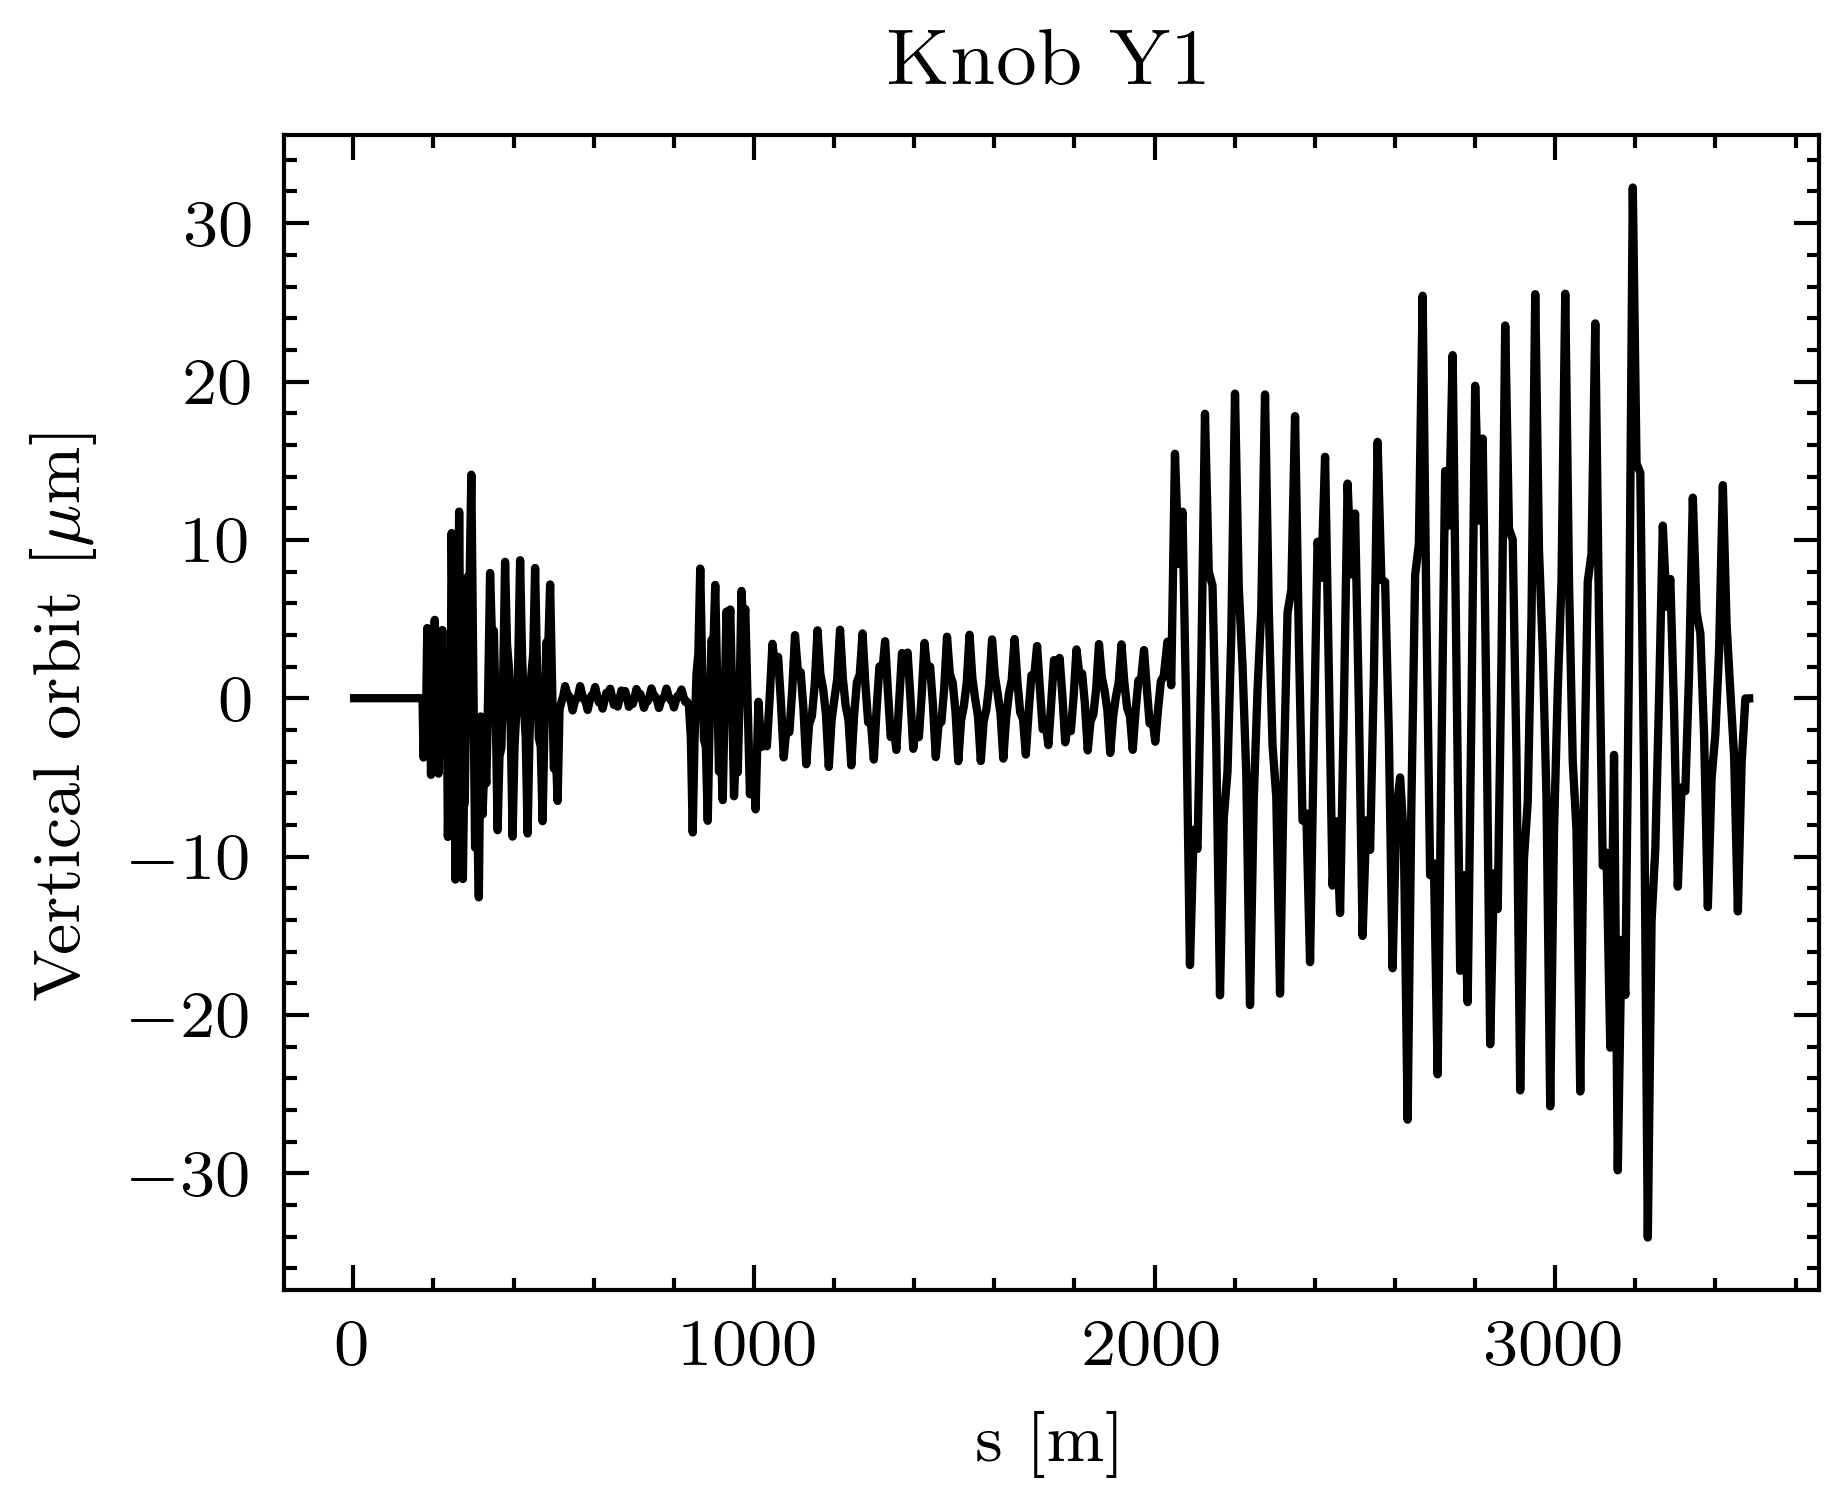

The last 2 BPMs orbit -19.5602 nm and -11.183200000000001 nm


In [74]:
knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y1")
    plt.plot(beam_orbit.s, beam_orbit.y, '-', markersize = 0.5)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
#    plt.xlim(3000,)
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

print(f"The last 2 BPMs orbit {beam_orbit.y.values[-2] * 1e3} nm and {beam_orbit.y.values[-1] * 1e3} nm")

Checking out how do the luminosity depends on the one of the beams offset at the BDS entrance. In the calculations I performed, the beam orbit at the ML exit is around 5-10 nm. I want to see how do the offsets at that level impact the luminosity at the IP.

In [85]:
import placetmachine as pl
import os
import numpy as np


average = lambda data: sum(data) / len(data)
rms = lambda data: np.sqrt(sum(list(map(lambda x: x * x, data))) / len(data) - average(data)**2)

clic = pl.Machine(save_logs = True)

#+++++++++++Beamline creation+++++++++++
# cavities info is mandatory for the beamline creation
# this is what we use for the CLIC BDS. It does not affect
# anything, since we have no cavities in the lattice.
cavity_structure = {
    'a': 2.75e-3,
    'g': 7e-3,
    'l': 8.33333e-3,
    'delta': 0.145,
    'delta_g': 0.333e-3
}

clic.create_beamline("clic380_v2.tcl", name = "clic_bds", parser = "advanced", 
    parser_variables = dict(e0 = 190, mult_synrad = 1, quad_synrad = 1, sbend_synrad = 1), cavities_setup = cavity_structure)

beam_parameters =  {
    'emitt_x': 9.5,
    'emitt_y': 0.30,
    'e_spread': -1.0,
    'e_initial': 190,
    'sigma_z': 70.0, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 33.07266007,
    'beta_y': 8.962361942,
    'alpha_x': 0.0,
    'alpha_y': 0.0,
    'n_total': 40000
}

main_beam = clic.make_beam_many("main_beam", 200, 200, **beam_parameters)

res = clic.eval_obs(main_beam, ['y'], beam_type = 'particle')

print(res)

#x = track_res.x.values
#y = track_res.y.values

#print(f"sigma_x = {rms(x) * 1e3} nm, sigma_y = {rms(y) * 1e3} nm")

Output()

********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

[15:20:24]  Warning! Machine.cavities_setup(): Parameter 'phase' is not given, using default value   ]8;id=616411;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py\machine.py]8;;\:]8;id=669889;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py#410\410]8;;\
           (0.0).                                                                                                  

            Warning! Machine.cavities_setup(): Parameter 'frac_lambda' is not given, using default   ]8;id=516414;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py\machine.py]8;;\:]8;id=164870;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py#410\410]8;;\
           value (0.0).                                                                                            

            Warning! Machine.cavities_setup(): Parameter 'scale' is not given, using default value   ]8;id=355105;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py\machine.py]8;;\:]8;id=834899;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py#410\410]8;;\
           (0.0).                                                                                                  

           Beamline created                                                                           ]8;id=365433;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py\machine.py]8;;\:]8;id=95170;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py#69\69]8;;\

Output()

[15:21:10] Beam created                                                                               ]8;id=424280;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py\machine.py]8;;\:]8;id=560910;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py#69\69]8;;\

[[-0.000479987279092597, -8.16221857746768e-05, -0.000566264446945297, -0.000281704866587518, 0.000746234554412695, 0.000643618471656282, 0.00033293899988962, 0.00176058034782045, -0.00363339653307548, -0.000985285009761583, -0.00178629852419476, -0.00473546187245688, -0.00105254334092564, 0.00749848258220709, -0.00376821679259365, -0.000262744319343255, -0.00219602068727909, 0.00128575777746676, 0.00199727894255375, 0.000257045392316968, -0.000922378982437522, 4.79193195985772e-05, -0.00402134269444332, -0.00269796698603386, -6.39664794448436e-05, -0.00259795285302289, 0.000104344577209758, 0.00229386501013096, 0.00296056821753155, 0.000897120695981357, -0.00270876263003572, 0.00094374200379832, 0.00280715007065169, 0.00111333661681101, -0.000861575227688149, 0.00235530359487868, -0.00116285907422764, 0.000505253719552456, -0.00351917786679579, 0.00259603785151086, 0.00449145550527419, 0.000766583936439247, -0.000498934660889461, -0.00433067527855258, -0.0059362000862393, 0.0013286676

In [84]:
res = clic.eval_obs(main_beam, ['y', 'py'], beam_type = 'particle')

x = res[0]
y = res[1]

print(f"sigma_x = {rms(x) * 1e3} nm, sigma_y = {rms(y) * 1e3} nm")

sigma_x = 143.47699601702732 nm, sigma_y = 2.6510758626506488 nm
